In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.preprocessing import MinMaxScaler
import os
import random

In [4]:
def set_seed(seed: int):
    random.seed(seed) # Python
    np.random.seed(seed)  # Numpy, é o gerador utilizado pelo sklearn
    os.environ["PYTHONHASHSEED"] = str(seed)  # sistema operativo

set_seed(25)

In [5]:
# Load dataset
radi = pd.read_csv("../prep5/train_full_prep5.csv")
radi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 842 entries, Age to Transition
dtypes: float64(841), object(1)
memory usage: 2.0+ MB


In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

# Estado vai ser comum para todos os modelos, 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)


## Bagging

Best RandomForest Model Parameters: {'n_estimators': 50}
0.3733714769257546


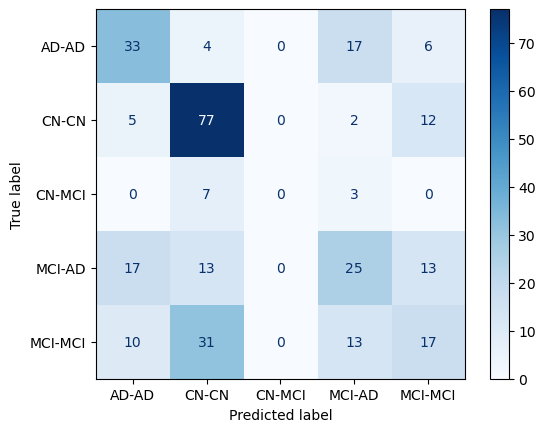

In [9]:
# Split data into features and target
df = radi.copy()
X = df.drop(columns=["Transition"])
y = df["Transition"]

bagging_params = {"n_estimators": [50,100,200,300]}
bagging_model = BaggingClassifier(random_state=2025)
bagging_grid = GridSearchCV(bagging_model, bagging_params, scoring='f1_macro', cv=skf, n_jobs=-1)
bagging_grid.fit(X, y)
print(f"Best RandomForest Model Parameters: {bagging_grid.best_params_}")
f1_scores = cross_val_score(bagging_grid.best_estimator_,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())

y_pred = cross_val_predict(bagging_grid.best_estimator_, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging_grid.best_estimator_.classes_)
disp.plot(cmap="Blues")

## Random Forest

Best RandomForest Model Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'n_estimators': 50}
0.3582177872322093


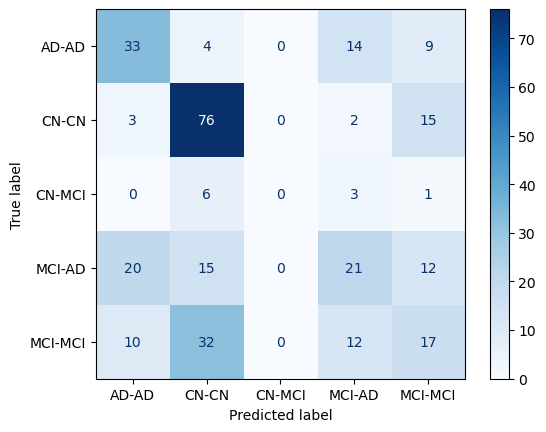

In [7]:
# Split data into features and target
df = radi.copy()
X = df.drop(columns=["Transition"])
y = df["Transition"]

# Params Definition
"""
rf_params = {"n_estimators": [100,300,500],
             "max_depth": [5, 10, 20, None],
             "criterion" :["gini","entropy"],
             "max_features":["sqrt","log2", None]     
             }

            "50"
             "20"
             "gini"
             "None"
             0.3582177872322093

"""

rf_params = {"n_estimators": [50],
             "max_depth": [20],
             "criterion" :["gini"],
             "max_features":[None]     
             }

            
rf_model = RandomForestClassifier(random_state=2025)

# model, params, scoring using f1, 5 folds, full processor
rf_grid = GridSearchCV(rf_model, rf_params, scoring='f1_macro', cv=skf, n_jobs=-1)
rf_grid.fit(X,y)
print(f"Best RandomForest Model Parameters: {rf_grid.best_params_}")
f1_scores = cross_val_score(rf_grid.best_estimator_,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())

y_pred = cross_val_predict(rf_grid.best_estimator_, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_grid.best_estimator_.classes_)
disp.plot(cmap="Blues")


Accuracy: 0.21311475409836064
Precision: 0.18381192194082613
Recall: 0.19855392156862745
F1 Score: 0.12028141699242847


/Users/nunorodrigues/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


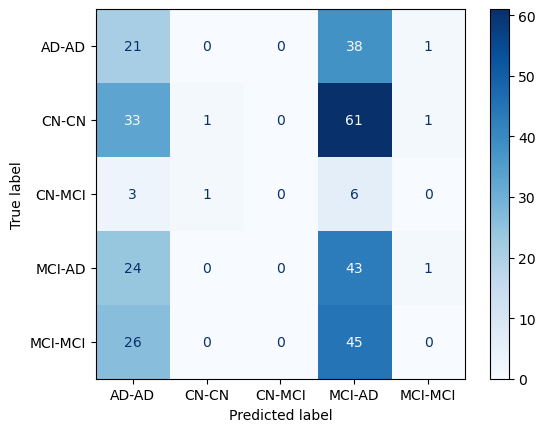

In [10]:
### Check with the control Dataset!

# Load the control dataset
control_data = pd.read_csv("../prep5/control_processed_prep5.csv")
X_control = control_data.drop(columns=["Transition"])
y_control = control_data["Transition"]
#gb_grid.best_estimator_

control_predictions = rf_grid.best_estimator_.predict(X_control)

# 3. Evaluate performance
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Example for classification:
accuracy = accuracy_score(y_control, control_predictions)
precision = precision_score(y_control, control_predictions, average="macro")
recall = recall_score(y_control, control_predictions, average="macro")
f1 = f1_score(y_control, control_predictions, average="macro")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Optional: Display the confusion matrix
cm = confusion_matrix(y_control, control_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_grid.best_estimator_.classes_)
disp.plot(cmap="Blues")

## Gradient Boosting

Best Gradient Boost Model Parameters: {'learning_rate': 0.3, 'loss': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
0.3417127614108597


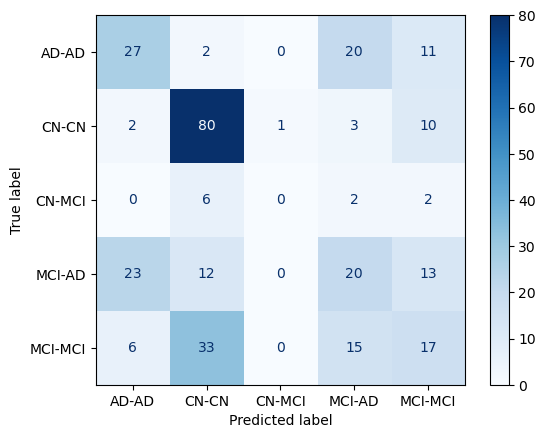

In [7]:
# Split data into features and target
df = radi.copy()
X = df.drop(columns=["Transition"])
y = df["Transition"]

# Params Definition
"""
gb_params = {"n_estimators": [100,50,300],
             "max_depth": [5, 10, 20, None],
             "learning_rate": [0.1, 0.3,0.01],
             "max_features":["sqrt","log2", None],
             "loss": ["log_loss", "exponential"]
             }

            "n_estimators": [100],
             "max_depth": [5],
             "learning_rate": [0.3],
             "max_features":["sqrt"],
             "loss": ["log_loss"]
             0.3417127614108597
"""

gb_params = {"n_estimators": [100],
             "max_depth": [5],
             "learning_rate": [0.3],
             "max_features":["sqrt"],
             "loss": ["log_loss"]
             }
gb_model = GradientBoostingClassifier(random_state=2025)

# model, params, scoring using f1, 5 folds, full processor
gb_grid = GridSearchCV(gb_model, gb_params, scoring='f1_macro', cv=skf, n_jobs=-1)
gb_grid.fit(X,y)

print(f"Best Gradient Boost Model Parameters: {gb_grid.best_params_}")

f1_scores = cross_val_score(gb_grid.best_estimator_,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())

y_pred = cross_val_predict(gb_grid.best_estimator_, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_grid.best_estimator_.classes_)
disp.plot(cmap="Blues")


## XGBoosting

Best XGB Model Parameters: {'eval_metric': 'mlogloss', 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 50}
0.327516585701232


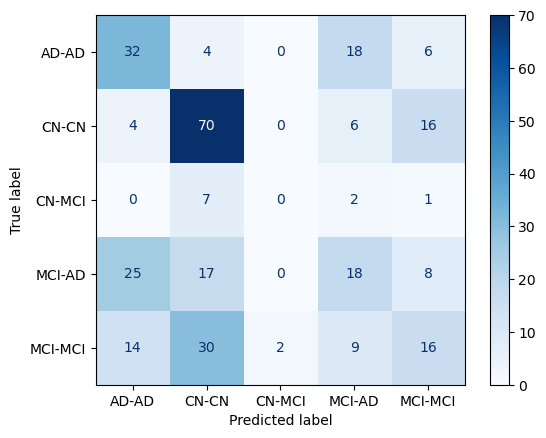

In [8]:
# Split data into features and target
df = radi.copy()
X = df.drop(columns=["Transition"])
y = df["Transition"]

"""

xgb_params = {
    "n_estimators": [50,100,200,300],
    "learning_rate": [0.1,0.01,0.3],
    "max_depth": [5,6,8,0],
    "eval_metric":["mlogloss","merror","auc"]

}

        "50"
        "0.3"
        "5"
        "mlogloss"
        0.327516585701232

"""

xgb_params = {
    "n_estimators": [50],
    "learning_rate": [0.3],
    "max_depth": [5],
    "eval_metric":["mlogloss"]
    
}

xgb_model = XGBClassifier(random_state=2025)

# Initialize and fit LabelEncoder on `y` to transform labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# model, params, scoring using f1, 5 folds, full processor
xgb_grid = GridSearchCV(xgb_model, xgb_params, scoring='f1_macro', cv=skf, n_jobs=-1)
xgb_grid.fit(X,y_encoded)
print(f"Best XGB Model Parameters: {xgb_grid.best_params_}")
f1_scores = cross_val_score(xgb_grid.best_estimator_,X,y_encoded,cv=skf,scoring="f1_macro")
print(f1_scores.mean())

# Generate predictions using cross-validation
y_pred = cross_val_predict(xgb_grid.best_estimator_, X, y_encoded, cv=skf)

# Decode y_encoded and y_pred back to original labels
y_decoded = label_encoder.inverse_transform(y_encoded)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Generate the confusion matrix
cm = confusion_matrix(y_decoded, y_pred_decoded)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")


## SVM

Best SVM Model Parameters: {'C': 1000, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.3402455487564628


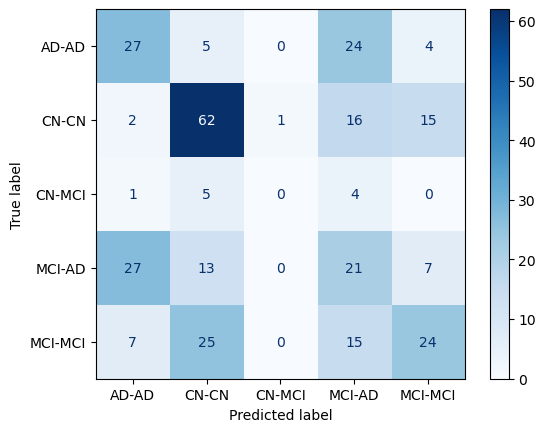

In [9]:
from sklearn.svm import SVC

df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]

"""
# Define the parameter grid for SVC
param_grid = {
    'C': [1, 10, 100,1000],              # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly','sigmoid','precomputed'],  # Kernel types ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
    'gamma': ['scale', 'auto'],           # Kernel coefficient for 'rbf' and 'poly' kernels
}
    "100"
    "sigmoid"
    "scale"
    0.3347556554684777
"""

param_grid = {
    'C': [1, 10, 100,1000],              # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],  # Kernel types ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
    'gamma': ['scale', 'auto'],           # Kernel coefficient for 'rbf' and 'poly' kernels
}

# Initialize the SVC model
svm_model = SVC(random_state=2025)

svm_grid = GridSearchCV(svm_model,param_grid, 
                           cv=skf, scoring='f1_macro', n_jobs=-1)

svm_grid.fit(X, y)
print(f"Best SVM Model Parameters: {svm_grid.best_params_}")
f1_scores = cross_val_score(svm_grid.best_estimator_,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(svm_grid.best_estimator_, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.best_estimator_.classes_)
disp.plot(cmap="Blues")

## Stacking

0.2935565561721022


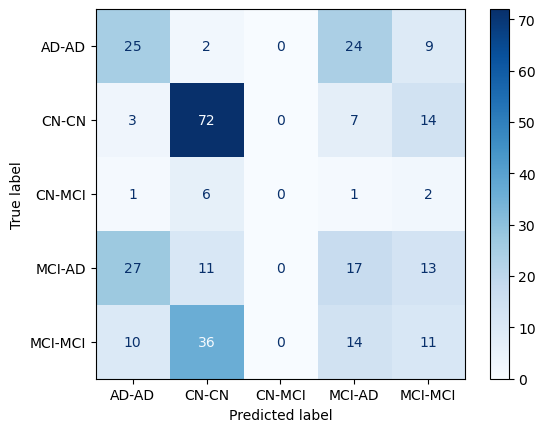

In [10]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]

meta_model = RandomForestClassifier(random_state=25)

#svm_grid.fit(X,y)
#gb_grid.fit(X,y)
#rf_grid.fit(X,y)

estimators = [("gb", gb_grid.best_estimator_), ("svm", svm_grid.best_estimator_), ("rf", rf_grid.best_estimator_)]
st_model = StackingClassifier(estimators=estimators, final_estimator = meta_model,n_jobs=-1) 
st_model.fit(X,y)
f1_scores = cross_val_score(st_model,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(st_model, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=st_model.classes_)
disp.plot(cmap="Blues")
#0.3410804644037079

0.34974545363018816


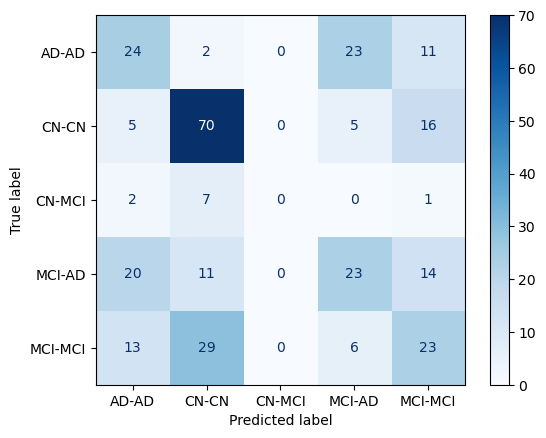

In [11]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]

meta_model = RandomForestClassifier(random_state=25)

#gb_grid.fit(X,y)
#rf_grid.fit(X,y)

estimators = [("gb", gb_grid.best_estimator_), ("rf", rf_grid.best_estimator_)]
st_model2 = StackingClassifier(estimators=estimators, final_estimator = meta_model,n_jobs=-1) 
st_model2.fit(X,y)
f1_scores = cross_val_score(st_model2,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(st_model2, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=st_model2.classes_)
disp.plot(cmap="Blues")

## Max Voting

0.3576274290043496


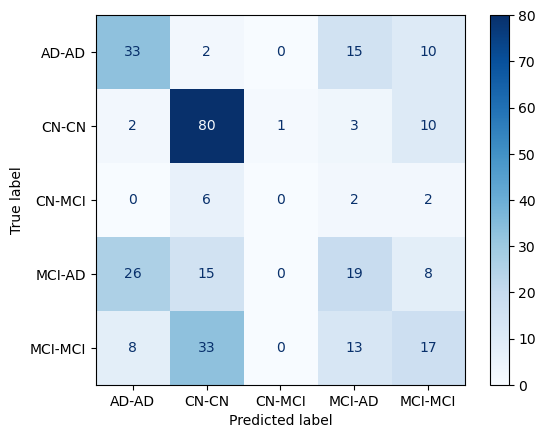

In [12]:
from sklearn.ensemble import VotingClassifier

df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]

estimators = [("gb", gb_grid.best_estimator_), ("svm", svm_grid.best_estimator_), ("rf", rf_grid.best_estimator_)]
vt_model = VotingClassifier(estimators=estimators, voting = 'hard', weights = [3,1,2],n_jobs=-1) 
vt_model.fit(X,y)
f1_scores = cross_val_score(vt_model,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(vt_model, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vt_model.classes_)
disp.plot(cmap="Blues")

## Generating csv

In [13]:
# Load the test dataset
test_data = pd.read_csv("../prep5/test_processed_prep5.csv")


# Generate predictions using the RandomForest model
rf_predictions_test = rf_grid.best_estimator_.predict(test_data)

# Generate predictions using the GB model
gb_predictions_test = gb_grid.best_estimator_.predict(test_data)

xgb_predictions_test = xgb_grid.best_estimator_.predict(test_data)

# Generate predictions using the Voting model
st_predictions_test = st_model.predict(test_data)

# Generate predictions using the Voting model
vb_predictions_test = vt_model.predict(test_data)

xgb_predictions_test_decoded = label_encoder.inverse_transform(xgb_predictions_test)

res0 = pd.DataFrame({
    'RowId': range(1, len(xgb_predictions_test_decoded ) + 1),
    'Result': xgb_predictions_test_decoded 
})


# Store the results in a DataFrame and save to CSV
res1 = pd.DataFrame({
    'RowId': range(1, len(rf_predictions_test) + 1),
    'Result': rf_predictions_test
})

# Store the results in a DataFrame and save to CSV
res2 = pd.DataFrame({
    'RowId': range(1, len(gb_predictions_test) + 1),
    'Result': gb_predictions_test
})

res3 = pd.DataFrame({
    'RowId': range(1, len(vb_predictions_test) + 1),
    'Result': vb_predictions_test
})

res4 = pd.DataFrame({
    'RowId': range(1, len(st_predictions_test) + 1),
    'Result': st_predictions_test
})



# Save predictions to a CSV file
res0.to_csv('NXGBGrid5.2.csv', index=False)
res1.to_csv('NRandomForestGrid5.2.csv', index=False)
res2.to_csv('NGradientBoostingGrid5.2.csv', index=False)
res3.to_csv('NVoting5.2.csv', index=False)
res4.to_csv('NStacking5.2.csv', index=False)

In [ ]:
# Load the test dataset
test_data = pd.read_csv("../prep5/test_processed_prep5.csv")

# Generate predictions 
st2_predictions_test = st_model2.predict(test_data)

res5 = pd.DataFrame({
    'RowId': range(1, len(st2_predictions_test) + 1),
    'Result': st2_predictions_test
})


res5.to_csv('NStacking5.1.1.csv', index=False)

In [11]:
# Load the test dataset
test_data = pd.read_csv("../prep5/test_processed_prep5.csv")

# Generate predictions using the RandomForest model
bg_predictions_test = bagging_grid.best_estimator_.predict(test_data)

res6 = pd.DataFrame({
    'RowId': range(1, len(bg_predictions_test) + 1),
    'Result': bg_predictions_test
})

res6.to_csv('NBagging5.2.csv', index=False)

Best RandomForest Model Parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'n_estimators': 45}
0.302334614067915


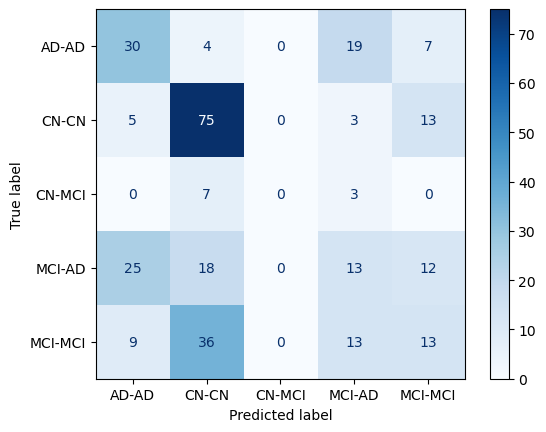

In [20]:
# Split data into features and target
df = radi.copy()
X = df.drop(columns=["Transition"])
y = df["Transition"]

# Params Definition
"""
rf_params = {"n_estimators": [100,300,500],
             "max_depth": [5, 10, 20, None],
             "criterion" :["gini","entropy"],
             "max_features":["sqrt","log2", None]     
             }

            "50"
             "20"
             "gini"
             "None"
             0.3582177872322093

"""

rf_params = {"n_estimators": [45],
             "max_depth": [15],
             "criterion" :["gini"],
             "max_features":[None]     
             }

            
rf_model = RandomForestClassifier(random_state=2025)

# model, params, scoring using f1, 5 folds, full processor
rf_grid = GridSearchCV(rf_model, rf_params, scoring='f1_macro', cv=skf, n_jobs=-1)
rf_grid.fit(X,y)
print(f"Best RandomForest Model Parameters: {rf_grid.best_params_}")
f1_scores = cross_val_score(rf_grid.best_estimator_,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())

y_pred = cross_val_predict(rf_grid.best_estimator_, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_grid.best_estimator_.classes_)
disp.plot(cmap="Blues")

rf_predictions_test = rf_grid.best_estimator_.predict(test_data)

res7 = pd.DataFrame({
    'RowId': range(1, len(rf_predictions_test) + 1),
    'Result': rf_predictions_test
})
res7.to_csv('NRFOVERTUNE5.2.csv', index=False)

# Exploitation

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.preprocessing import MinMaxScaler
import os
import random

def set_seed(seed: int):
    random.seed(seed) # Python
    np.random.seed(seed)  # Numpy, é o gerador utilizado pelo sklearn
    os.environ["PYTHONHASHSEED"] = str(seed)  # sistema operativo

set_seed(25)

In [60]:
# Load dataset
radi = pd.read_csv("../prep5/train_full_prep5.csv")
test_data = pd.read_csv("../prep5/test_processed_prep5.csv")

In [61]:
# ADABOST ?
# ExtraTrees ? 
# Random Forest ?
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,RandomForestClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

# Estado vai ser comum para todos os modelos, 
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=25)


Best ADA Model Parameters: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 200}
0.34460482737916137


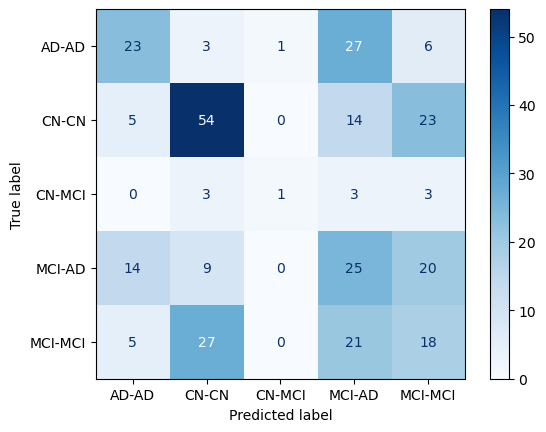

In [62]:
# Ada Boost
from imblearn.over_sampling import SMOTE

df = radi.copy()
X = df.drop(columns=["Transition"])
y = df["Transition"]


# Specify which classes to oversample
# smote = SMOTE(sampling_strategy={'MCI-AD': 70,'AD-AD':75}, random_state=25)  # Target specific count
"""
Best ADA Model Parameters: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 200}
0.34460482737916137
"""

ada_params = {"n_estimators": [200],
             "learning_rate": [1],
              "algorithm":["SAMME"]
             }

X_resampled, y_resampled = (X, y)            
ada_model = AdaBoostClassifier(random_state=2025)

# model, params, scoring using f1, 5 folds, full processor
ada_grid = GridSearchCV(ada_model, ada_params , scoring='f1_macro', cv=skf, n_jobs=-1)
ada_grid.fit(X_resampled,y_resampled)
print(f"Best ADA Model Parameters: {ada_grid.best_params_}")
f1_scores = cross_val_score(ada_grid.best_estimator_,X_resampled,y_resampled,cv=skf,scoring="f1_macro")
print(f1_scores.mean())

y_pred = cross_val_predict(ada_grid.best_estimator_, X_resampled, y_resampled, cv=skf)
cm = confusion_matrix(y_resampled, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada_grid.best_estimator_.classes_)
disp.plot(cmap="Blues")


Best EXC Model Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}
0.3338947400740994


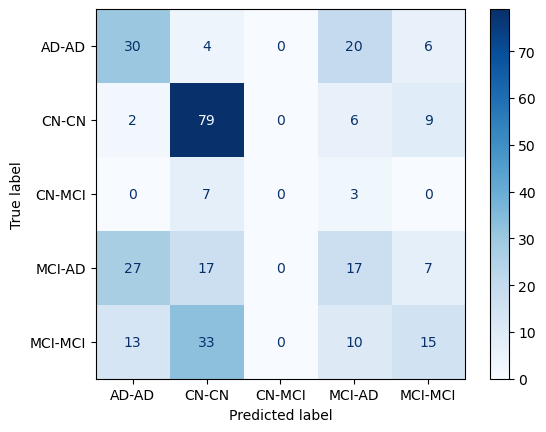

In [63]:
## EXC
df = radi.copy()
X = df.drop(columns=["Transition"])
y = df["Transition"]


# Specify which classes to oversample
# smote = SMOTE(sampling_strategy={'MCI-AD': 70, 'MCI-MCI': 75,'AD-AD':75}, random_state=25)  # Target specific count

X_resampled, y_resampled = (X, y)

# Params Definition
"""
"n_estimators": "n_estimators": [80],
             "max_depth": [20],
             "criterion" :["gini"],
             "max_features":["sqrt"],
              "bootstrap":[False]    
            0.33952772606850457
"""

exc_params = {"n_estimators": [300],
             "max_depth": [20],
             "criterion" :["entropy"],
             "max_features":["sqrt"],
              "bootstrap":[False]
             }

            
exc_model = ExtraTreesClassifier(random_state=2025)

# model, params, scoring using f1, 5 folds, full processor
exc_grid = GridSearchCV(exc_model, exc_params, scoring='f1_macro', cv=skf, n_jobs=-1)
exc_grid.fit(X_resampled,y_resampled)
print(f"Best EXC Model Parameters: {exc_grid.best_params_}")
f1_scores = cross_val_score(exc_grid.best_estimator_,X_resampled,y_resampled,cv=skf,scoring="f1_macro")
print(f1_scores.mean())

y_pred = cross_val_predict(exc_grid.best_estimator_, X_resampled, y_resampled, cv=skf)
cm = confusion_matrix(y_resampled, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=exc_grid.best_estimator_.classes_)
disp.plot(cmap="Blues")

Best RandomForest Model Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 100}
0.3318740132776435


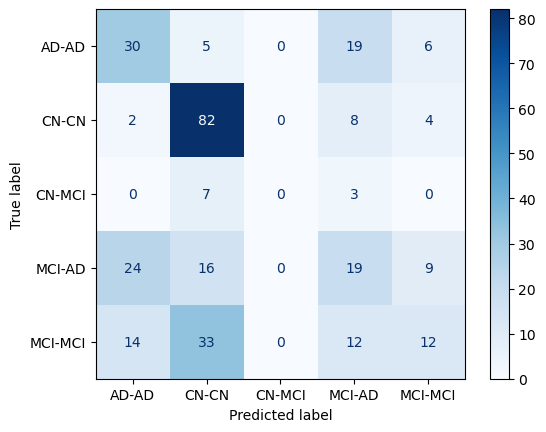

In [64]:
# RandomForest 
df = radi.copy()
X = df.drop(columns=["Transition"])
y = df["Transition"]

# Params Definition
"""
rf_params = {"n_estimators": [100,300,500],
             "max_depth": [5, 10, 20, None],
             "criterion" :["gini","entropy"],
             "max_features":["sqrt","log2", None]     
             }
             "100"
             "20"
             "entropy"
             "log2"
             0.3369315523878811
"""

rf_params = {"n_estimators": [100],
             "max_depth": [20],
             "criterion" :["entropy"],
             "max_features":["log2"]    
             }

            
rf_model = RandomForestClassifier(random_state=2025)

# model, params, scoring using f1, 5 folds, full processor
rf_grid = GridSearchCV(rf_model, rf_params, scoring='f1_macro', cv=skf, n_jobs=-1)
rf_grid.fit(X,y)
print(f"Best RandomForest Model Parameters: {rf_grid.best_params_}")
f1_scores = cross_val_score(rf_grid.best_estimator_,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())

y_pred = cross_val_predict(rf_grid.best_estimator_, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_grid.best_estimator_.classes_)
disp.plot(cmap="Blues")

0.30862756572064665


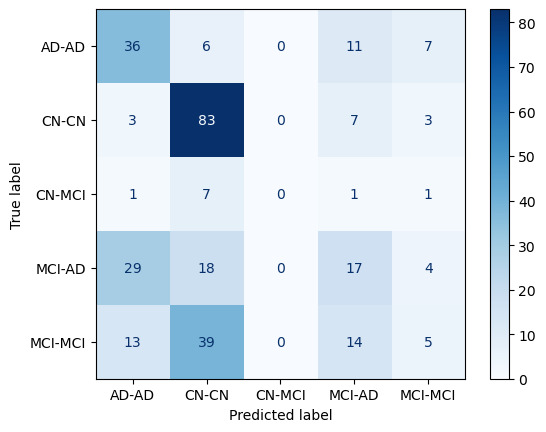

In [65]:
### Stacking dos modelos criados

df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]

meta_model = RandomForestClassifier(random_state=25)
meta_model2 = LogisticRegression(random_state=25)

estimators = [("ada", ada_grid.best_estimator_), ("exc", exc_grid.best_estimator_)]
st_model = StackingClassifier(estimators=estimators, final_estimator = meta_model2,n_jobs=-1,cv=skf,stack_method="predict_proba") 
st_model.fit(X,y)
f1_scores = cross_val_score(st_model,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(st_model, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=st_model.classes_)
disp.plot(cmap="Blues")

Counter({'AD-AD': 95, 'MCI-AD': 94, 'MCI-MCI': 89, 'CN-CN': 88, 'CN-MCI': 10})
0.4872826461037285


/Users/nunorodrigues/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/Users/nunorodrigues/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/Users/nunorodrigues/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/nunorodrigues/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


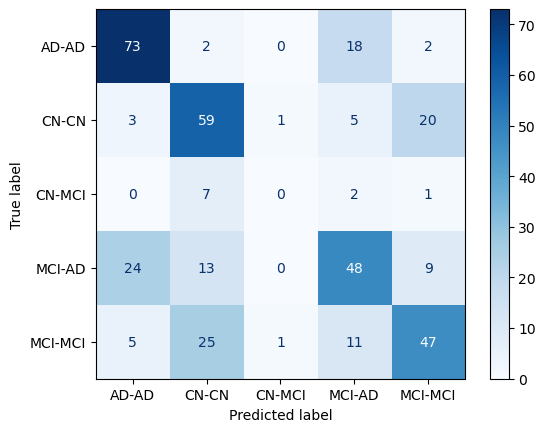

In [66]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN

# Initial setup
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=25)
df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]

# Save original CN-MCI samples
mask_cn_mci = y == 'CN-MCI'
X_cn_mci_original = X[mask_cn_mci]
y_cn_mci_original = y[mask_cn_mci]

# Remove CN-MCI samples from main dataset
mask_others = y != 'CN-MCI'
X_others = X[mask_others]
y_others = y[mask_others]

# Apply SMOTETomek on remaining classes
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=25)
X_resampled, y_resampled = smote_tomek.fit_resample(X_others, y_others)

# Combine back with original CN-MCI samples
X_final = np.vstack([X_resampled, X_cn_mci_original])
y_final = np.concatenate([y_resampled, y_cn_mci_original])

class_counts = Counter(y_final)
print(class_counts)

estimators = [
    ("ada", ada_grid.best_estimator_),
    ("exc", exc_grid.best_estimator_),
    ("rf", RandomForestClassifier(
        class_weight='balanced',
        n_estimators=50,
        random_state=2025
    )),
    ("gb", GradientBoostingClassifier(
        random_state=2025,
        n_estimators=50,
        max_depth=5,
        learning_rate=0.3)
    )
]

vt_model = VotingClassifier(
    estimators=estimators,
    voting='soft',
    weights=[2,2,1,1],
    n_jobs=-1
)

vt_model.fit(X_final, y_final)
f1_scores = cross_val_score(vt_model, X_final, y_final, cv=skf, scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(vt_model, X_final, y_final, cv=skf)
cm = confusion_matrix(y_final, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vt_model.classes_)
disp.plot(cmap="Blues")

vt_predictions_test = vt_model.predict(test_data)

res0 = pd.DataFrame({
    'RowId': range(1, len(vt_predictions_test ) + 1),
    'Result': vt_predictions_test 
})
res0.to_csv('NEXPLOITVOTING_5.0-tomek_no_cnmci', index=False)

Counter({'AD-AD': 106, 'CN-CN': 96, 'MCI-MCI': 71, 'MCI-AD': 68, 'CN-MCI': 10})
0.40181790002655077


/Users/nunorodrigues/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/Users/nunorodrigues/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/Users/nunorodrigues/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/nunorodrigues/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


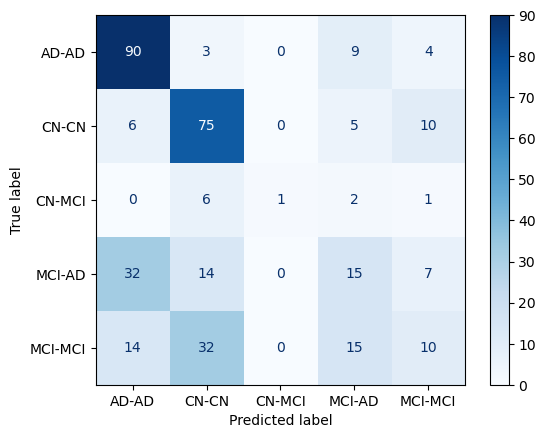

In [67]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
test_data = pd.read_csv("../prep5/test_processed_prep5.csv")
# Initial setup
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=25)
df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]

# Save original CN-MCI samples
mask_cn_mci = y == 'CN-MCI'
X_cn_mci_original = X[mask_cn_mci]
y_cn_mci_original = y[mask_cn_mci]

# Remove CN-MCI samples from main dataset
mask_others = y != 'CN-MCI'
X_others = X[mask_others]
y_others = y[mask_others]


adasyn = ADASYN(sampling_strategy='minority', random_state=25)
X_resampled, y_resampled = adasyn.fit_resample(X_others, y_others)

# Combine back with original CN-MCI samples
X_final = np.vstack([X_resampled, X_cn_mci_original])
y_final = np.concatenate([y_resampled, y_cn_mci_original])

class_counts = Counter(y_final)
print(class_counts)

estimators = [
    ("ada", ada_grid.best_estimator_),
    ("exc", exc_grid.best_estimator_),
    ("rf", RandomForestClassifier(
        class_weight='balanced',
        n_estimators=50,
        random_state=2025
    )),
    ("gb", GradientBoostingClassifier(
        random_state=2025,
        n_estimators=50,
        max_depth=5,
        learning_rate=0.3)
    )
]

vt_model = VotingClassifier(
    estimators=estimators,
    voting='soft',
    weights=[2,2,1,1],
    n_jobs=-1
)

vt_model.fit(X_final, y_final)
f1_scores = cross_val_score(vt_model, X_final, y_final, cv=skf, scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(vt_model, X_final, y_final, cv=skf)
cm = confusion_matrix(y_final, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vt_model.classes_)
disp.plot(cmap="Blues")

# Generate predictions using the Voting model
vt_predictions_test = vt_model.predict(test_data)

res0 = pd.DataFrame({
    'RowId': range(1, len(vt_predictions_test ) + 1),
    'Result': vt_predictions_test 
})
res0.to_csv('NEXPLOITVOTING_5.0-adasyn_no_cnmci', index=False)

Counter({'CN-CN': 96, 'MCI-MCI': 71, 'MCI-AD': 68, 'AD-AD': 60, 'CN-MCI': 10})
0.3523307106331521


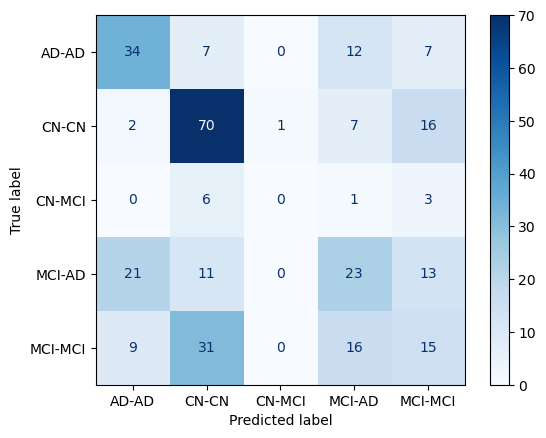

In [68]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN

# Initial setup
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=25)
df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]

X_final = X
y_final = y

class_counts = Counter(y_final)
print(class_counts)

estimators = [
    ("ada", ada_grid.best_estimator_),
    ("exc", exc_grid.best_estimator_),
    ("rf", RandomForestClassifier(
        class_weight='balanced',
        n_estimators=50,
        random_state=2025
    )),
    ("gb", GradientBoostingClassifier(
        random_state=2025,
        n_estimators=50,
        max_depth=5,
        learning_rate=0.3)
    )
]

vt_model = VotingClassifier(
    estimators=estimators,
    voting='soft',
    weights=[2,2,1,1],
    n_jobs=-1
)

vt_model.fit(X_final, y_final)
f1_scores = cross_val_score(vt_model, X_final, y_final, cv=skf, scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(vt_model, X_final, y_final, cv=skf)
cm = confusion_matrix(y_final, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vt_model.classes_)
disp.plot(cmap="Blues")

# Generate predictions using the Voting model
vt_predictions_test = vt_model.predict(test_data)

res0 = pd.DataFrame({
    'RowId': range(1, len(vt_predictions_test ) + 1),
    'Result': vt_predictions_test 
})
res0.to_csv('NEXPLOITVOTING_5.0-no_smote', index=False)

Counter({'CN-CN': 96, 'MCI-MCI': 71, 'MCI-AD': 68, 'AD-AD': 60, 'CN-MCI': 10})
Counter({'CN-CN': 96, 'MCI-AD': 85, 'MCI-MCI': 85, 'AD-AD': 80, 'CN-MCI': 15})
0.5238620979508634


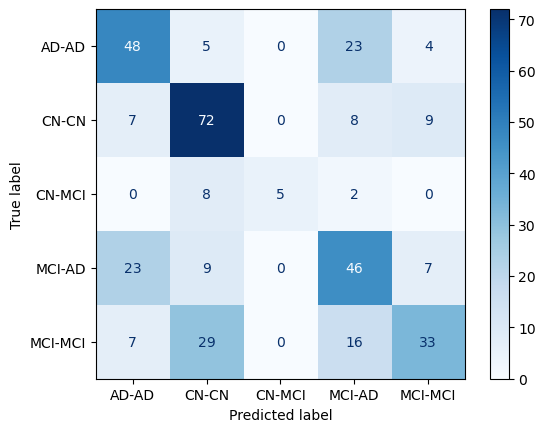

In [69]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN

# Initial setup
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=25)
df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]


class_counts = Counter(y)
print(class_counts)

smote = SMOTE(sampling_strategy={
    'CN-CN': 96,  # Keep majority class as is
    'MCI-MCI': 85,
    'MCI-AD': 85,
    'AD-AD': 80,
    'CN-MCI': 15  # Increase significantly but not to the majority level
}, random_state=25)

X_final,y_final=smote.fit_resample(X, y)


class_counts = Counter(y_final)
print(class_counts)

estimators = [
    ("ada", ada_grid.best_estimator_),
    ("exc", exc_grid.best_estimator_),
    ("rf", RandomForestClassifier(
        class_weight='balanced',
        n_estimators=50,
        random_state=2025
    )),
    ("gb", GradientBoostingClassifier(
        random_state=2025,
        n_estimators=50,
        max_depth=5,
        learning_rate=0.3)
    )
]

vt_model = VotingClassifier(
    estimators=estimators,
    voting='soft',
    weights=[2,3,1,1],
    n_jobs=-1
)

vt_model.fit(X_final, y_final)
f1_scores = cross_val_score(vt_model, X_final, y_final, cv=skf, scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(vt_model, X_final, y_final, cv=skf)
cm = confusion_matrix(y_final, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vt_model.classes_)
disp.plot(cmap="Blues")
"""
Counter({'CN-CN': 96, 'MCI-AD': 85, 'MCI-MCI': 85, 'AD-AD': 80, 'CN-MCI': 15})
0.5238620979508634
"""
# Generate predictions using the Voting model
vt_predictions_test = vt_model.predict(test_data)

res0 = pd.DataFrame({
    'RowId': range(1, len(vt_predictions_test ) + 1),
    'Result': vt_predictions_test 
})
res0.to_csv('NEXPLOITVOTING_5.0-smoteButBallancedNoRatio', index=False)

Counter({'CN-CN': 96, 'MCI-MCI': 71, 'MCI-AD': 68, 'AD-AD': 60, 'CN-MCI': 10})
Counter({'CN-CN': 96, 'MCI-MCI': 85, 'MCI-AD': 81, 'AD-AD': 71, 'CN-MCI': 11})
0.4930884427974938


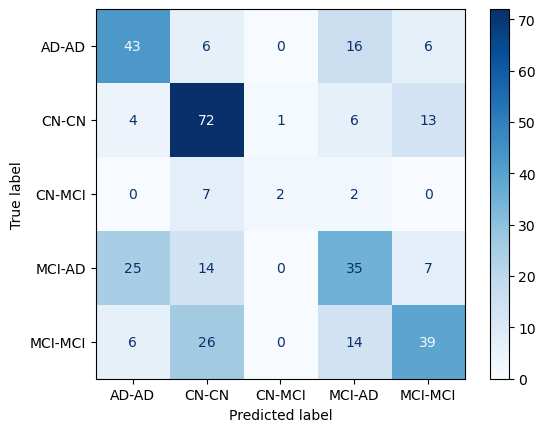

In [70]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initial setup
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=25)
df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]


class_counts = Counter(y)
print(class_counts)

smote = SMOTE(sampling_strategy={
    'CN-CN': 96,  # Keep majority class as is
    'MCI-MCI': 85,
    'MCI-AD': 81,
    'AD-AD': 71,
    'CN-MCI': 11  # Increase significantly but not to the majority level
}, random_state=25)

X_final,y_final=smote.fit_resample(X, y)


class_counts = Counter(y_final)
print(class_counts)

estimators = [
    ("ada", ada_grid.best_estimator_),
    ("exc", exc_grid.best_estimator_),
    ("rf", RandomForestClassifier(
        class_weight='balanced',
        n_estimators=50,
        random_state=2025
    )),
    ("gb", GradientBoostingClassifier(
        random_state=2025,
        n_estimators=50,
        max_depth=5,
        learning_rate=0.3)
    )
]

vt_model = VotingClassifier(
    estimators=estimators,
    voting='soft',
    weights=[2,3,1,1],
    n_jobs=-1
)

vt_model.fit(X_final, y_final)
f1_scores = cross_val_score(vt_model, X_final, y_final, cv=skf, scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(vt_model, X_final, y_final, cv=skf)
cm = confusion_matrix(y_final, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vt_model.classes_)
disp.plot(cmap="Blues")

# Generate predictions using the Voting model
vt_predictions_test = vt_model.predict(test_data)

res0 = pd.DataFrame({
    'RowId': range(1, len(vt_predictions_test ) + 1),
    'Result': vt_predictions_test 
})
res0.to_csv('NEXPLOITVOTING_5.0-smoteButBallanced', index=False)